In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re
from datetime import date


In [ ]:
Lenovo_url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239063&pageinfo=12"
#Asus_url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239052"
#HP_url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239061&pageinfo=8&q=%D7%9E%D7%97%D7%A9%D7%91%D7%99%D7%9D%20%D7%A0%D7%99%D7%99%D7%93%D7%99%D7%9D"
#Dell_url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239055&pageinfo=4"
#Apple_url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239051&pageinfo=3"

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get(Lenovo_url)


In [ ]:
manufacturer = []
gaming_adapt = []
operating_system = []
weight = []
RAM_memory_volume = []
CPU_speed = []
processor_model = []
processor_generation=[]
memory_type=[]
storage_capacity = []
hard_drive_type = []
optical_drive =[]
screen_size = []
screen_resolution = []
screen_type = []
display_refresh_rate = []
touch_screen = []
webcam=[]
security_measures=[]
cellular_modem=[]
low_price=[]
high_price = []
average_price = []
models_title=[]
Data_acquisition_date=[]
comp_model_url=[]
computer_entry_date=[]
graphics_card =[]
processor_type = []
series =[]
wireless_network=[]

In [ ]:
def nextPage(driver, current_page):
    print("arrived to next page function")
    driver.get(current_page)
    time.sleep(4)
    
    try:
        element = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a.page-item.next")))
        
        # Click on the element
        element.click()
        print("moved to url:", driver.current_url)
        
    except:
        try:
            # Find the selected element
            print("new nextpage function started")

            selected_element = driver.find_element(By.CSS_SELECTOR, '.page-item.selected')

            # Find the next sibling element
            next_element = selected_element.find_element(By.XPATH, 'following-sibling::a')

            # Get the href attribute value of the next element
            href = next_element.get_attribute('href')
            print("moved to url:", href)
            print("new nextpage function worked")
        except:
            print("No next element found or selected element not found.")

In [ ]:
def computers_url_in_page(driver):
    try:
        models_url_list = []
        # Wait for the elements to be present and clickable
        wait = WebDriverWait(driver, 10)
        elements = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "ModelPic")))

        # Iterate over the elements
        for element in elements:
            try:
                # Perform actions on each element
                models_url_list.append(element.get_attribute('href'))

            except Exception as e:
                models_url_list.append(" ")
                print(f"Error occurred while performing actions on an element: {str(e)}")

    except Exception as e:
        print(f"couldnt get the list")
    
#    print("page is:",driver.current_url, ", found:", len(models_url_list), "computers, list of urls:", models_url_list)
    
    return (models_url_list)
 

In [ ]:
#get price

def prices(driver):
    
    low_price_temp.clear()
    high_price_temp.clear()
    average_price_temp.clear()
    
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    price_wrappers = soup.find_all(class_="price-wrapper")
    
   
    # Extract the text from each element
    prices = [wrapper.get_text(strip=True) for wrapper in price_wrappers]

    flag=0     
    split_prices = []
    #cleaning the text to minPrice highPrice and average
    for price in prices:
        try:
            #if I get range 
            numbers = re.findall(r'\d{1,3}(?:,\d{3})*(?:\.\d+)?', price)
            min_price = int(numbers[1].replace(',', ''))
            max_price = int(numbers[0].replace(',', ''))
            average = (min_price + max_price) / 2
            split_prices.append({
                'minPrice': min_price,
                'maxPrice': max_price,
                'average': average
            })
            
        except:
            if(flag%3==0):
                clean_price = re.sub(r'[^\d]', '', price) #delete signs such as ₪ or $
                split_prices.append({
                    'minPrice': " ",
                    'maxPrice': " ",
                    'average': int(clean_price.replace(',', ''))
                })
            flag+=1

            

    for j in range(len(split_prices)):

        low_price_temp.append(split_prices[j]['minPrice'])
        high_price_temp.append(split_prices[j]['maxPrice'])
        average_price_temp.append(split_prices[j]['average'])




In [ ]:
def models(driver):
    html = driver.page_source
    time.sleep(2)
    soup = BeautifulSoup(html, 'html.parser')
    h1_tag = soup.find('div', class_='model-page-details').find('h1')

    if h1_tag:
        h1_text = h1_tag.text.strip()
        print(h1_text)
        models_title.append(h1_text)
    else:
        print("No <h1> tag found.")
        models_title.append(" ")

    #models_title = [re.sub(r'[\u0590-\u05FF]+', '', name) for name in models_title]



In [ ]:
def print_data():
    print("manufacturer=", len(manufacturer), ",", manufacturer)
    print("gaming_adap=:", len(gaming_adapt), ",", gaming_adapt)
    print("operating_system=", len(operating_system), ",", operating_system)
    print("weight=", len(weight), ",", weight)
    print("RAM_memory_volume=", len(RAM_memory_volume), ",", RAM_memory_volume)
    print("CPU_speed=", len(CPU_speed), ",", CPU_speed)
    print("processor_model=", len(processor_model), ",", processor_model)
    print("processor_generation=", len(processor_generation), ",", processor_generation)
    print("memory_type=", len(memory_type), ",", memory_type)
    print("storage_capacity=", len(storage_capacity), ",", storage_capacity)
    print("hard_drive_type=", len(hard_drive_type), ",", hard_drive_type)
    print("optical_drive=", len(optical_drive), ",", optical_drive)
    print("screen_size=", len(screen_size), ",", screen_size)
    print("screen_resolution=", len(screen_resolution), ",", screen_resolution)
    print("screen_type=", len(screen_type), ",", screen_type)
    print("display_refresh_rate=", len(display_refresh_rate), ",", display_refresh_rate)
    print("touch_screen=", len(touch_screen), ",", touch_screen)
    print("webcam=", len(webcam), ",", webcam)
    print("security_measures=", len(security_measures), ",", security_measures)
    print("cellular_modem=", len(cellular_modem), ",", cellular_modem)
    print("low_price=", len(low_price), ",", low_price)
    print("high_price=", len(high_price), ",", high_price)
    print("average_price=", len(average_price), ",", average_price)
    print("models=", len(models_title), ",", models_title)
    print("Data_acquisition_date=", len(Data_acquisition_date), ",", Data_acquisition_date)
    print("comp_model_url=", len(comp_model_url), ",", comp_model_url)
    print("computer_entry_date=", len(computer_entry_date), ",", computer_entry_date)


In [ ]:
def pages_number(driver):

    time.sleep(2)
    wait = WebDriverWait(driver, 10)
    last_page_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[@aria-label='אחרון']")))
    driver.execute_script("arguments[0].click();", last_page_button)
    element = wait.until(EC.presence_of_element_located((By.XPATH, "//a[contains(@class, 'page-item selected')]")))
    last_page_number = element.text

    number_of_pages= int(last_page_number)

     #get back to the first page
    driver.get(HP_url)
    
    return(last_page_number)


In [ ]:
wait = WebDriverWait(driver, 15)
couldnt_get_specifications=[]
#for i in range( ( pages_number(driver) ) -1):
for i in range(20):

    current_page = driver.current_url
    computers_urls = computers_url_in_page(driver)
    print("computers_urls:", computers_urls)
    
    #get price
    extract_price = prices(driver)
    print("average: " , average_price_temp, "length:", len(average_price_temp))
    
    counter_deleted_price = 0
    
    print("moving page ..")
    print(f"page number : {i+1}")

    
    for j in range(len(computers_urls)):
#    for j in range(1):
        print(f"computer number {j+1} in this page")
    
        try:
#trying to skip the click on 'specifications' button by changing the url to the 'specifications' page
            if "model.aspx" not in computers_urls[j]:
                print("url:", computers_urls[j], "does not contain 'model.aspx'")
            
                #delete the price of the computer that couldnt be reached
                low_price_temp.pop(j - counter_deleted_price)
                high_price_temp.pop(j - counter_deleted_price)
                average_price_temp.pop(j - counter_deleted_price)
                counter_deleted_price+=1
            
                continue  # Could not get relevant information, move to the next iteration
           
            
            else:
                computers_urls[j] = computers_urls[j].replace('model.aspx', 'compmodels.aspx')
                driver.get(computers_urls[j])
                time.sleep(4)
 
        except:
            driver.get(computers_urls[j])
            time.sleep(2)

            try:
                specifications = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, "מפרט טכני מלא")))
                if(specifications):
                    driver.execute_script("arguments[0].click();", specifications)
                    print("clicked on specifications")
                else:
                     raise Exception("couldnt reach Specifications")

            except:
                couldnt_get_specifications.append(computers_urls[j])
                print('could not click on', driver.title, "url:", computers_urls[j])
            
                #delete the price of the computer that couldnt be reached
                low_price_temp.pop(j - counter_deleted_price)
                high_price_temp.pop(j - counter_deleted_price)
                average_price_temp.pop(j - counter_deleted_price)
                counter_deleted_price+=1
                
            
                continue  # Could not get relevant information, move to the next iteration

        try:
            
            time.sleep(2)
            computer_model = models(driver)    #get model
            
        except:
            
            #in case the url leads to the actual store and not to Zap page
            print("got non desired page:", computers_urls[j])
            
            #delete the price of the computer that couldnt be reached
            low_price_temp.pop(j - counter_deleted_price)
            high_price_temp.pop(j - counter_deleted_price)
            average_price_temp.pop(j - counter_deleted_price)
            counter_deleted_price+=1
               
            #skip to the next iteration
            continue
            
            
        time.sleep(15)        
        specifications_details = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "ParamColValue")))
        values = [element.text.strip() for element in specifications_details]
        print("current url is:", driver.current_url)
        print ("computer values:", values)


        #add to the relevant arr
#        manufacturer.append(values[0])
 #       computer_entry_date.append(values[1])
  #      gaming_adapt.append(values[2])
   #     operating_system.append(values[3])
   #     weight.append(values[5])
    #    RAM_memory_volume.append(values[8])
     #   CPU_speed.append(values[9])
      #  processor_model.append(values[10])
       # processor_generation.append(values[11])
        #memory_type.append(values[12])
#        storage_capacity.append(values[13])
 #       hard_drive_type.append(values[14])
  #      optical_drive.append(values[15])
   #     screen_size.append(values[16])
    #    screen_resolution.append(values[17])
     #   screen_type.append(values[18])
      #  display_refresh_rate.append(values[19])
       # touch_screen.append(values[20])
 #       webcam.append(values[22])
  #      security_measures.append(values[23])
   #     cellular_modem.append(values[26])
    #    Data_acquisition_date.append(date.today()) #today's date
     #   comp_model_url.append(computers_urls[j])
        
        
        
        manufacturer.append(values[0])
        computer_entry_date.append(values[4])
        gaming_adapt.append(values[5])
        operating_system.append(values[6])
        weight.append(values[8])
        RAM_memory_volume.append(values[11])
        CPU_speed.append(values[12])
        processor_model.append(values[13])
        processor_generation.append(values[14])
        memory_type.append(values[15])
        storage_capacity.append(values[16])
        hard_drive_type.append(values[17])
        optical_drive.append(values[18])
        screen_size.append(values[19])
        screen_resolution.append(values[20])
        screen_type.append(values[21])
        display_refresh_rate.append(values[22])
        touch_screen.append(values[23])
        webcam.append(values[25])
        security_measures.append(values[26])
        cellular_modem.append(values[29])
        Data_acquisition_date.append(date.today()) #today's date
        comp_model_url.append(computers_urls[j])


    
    #arrange the models array
    filter_models = [re.sub(r'[\u0590-\u05FF]+', '', name) for name in models_title]
    models_title = filter_models
 

    #add the prices of all the computers that was got successfully
    low_price = low_price + low_price_temp
    high_price = high_price + high_price_temp
    average_price = average_price + average_price_temp

        
    
    
    print('page number', i+1, 'data:')
    print_data()
    
    print("--------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------------")
    #moving to the next page
    nextPage(driver, current_page)
    #driver.quit()
            


In [ ]:
df = pd.DataFrame(
    {"model":models_title, 
     "manufacturer": manufacturer, 
     "gaming_adapt": gaming_adapt, 
     "operating_system": operating_system, 
     "weight": weight, 
     "RAM_memory_volume": RAM_memory_volume,
     "CPU_speed": CPU_speed,
     "processor_model": processor_model, 
     "processor_generation": processor_generation, 
     "memory_type": memory_type,
     "storage_capacity": storage_capacity, 
     "hard_drive_type": hard_drive_type,
     "optical_drive": optical_drive, 
     "screen_size": screen_size,
     "screen_resolution": screen_resolution,
     "screen_type": screen_type,
     "display_refresh_rate": display_refresh_rate,
     "touch_screen": touch_screen,
     "webcam": webcam,
     "security_measures": security_measures, 
     "cellular_modem": cellular_modem, 
     "low_price": low_price, 
     "high_price": high_price, 
     "average_price":average_price,
     "Data_acquisition_date":Data_acquisition_date,
     "comp_model_url":comp_model_url,
     "computer_entry_date":computer_entry_date
     
    })

print(df)

df.to_csv(r"Lenovo.csv", mode='a', index=True)  



In [ ]:
from bs4 import BeautifulSoup
import sqlite3
import requests
import pandas as pd
from random import randint
import time
from time import sleep
from typing import List
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score

In [ ]:
def url_request_by_user():
    res = {"User-Agent":"PostmanRuntime/7.29.0"}
    return res


In [ ]:
def get_computers_from_link(url):
    min_price=0
    highh_price=0
    average_pricee=0
    
    All_data=[]
    All_headers = []
    page = requests.get(url, headers = url_request_by_user())
    soup= BeautifulSoup(page.content,'html.parser')
    details=soup.find_all('div',class_="paramRow")
    print("details ok")
    
    #get prices
    span_elements = soup.find('div', class_="prices-txt").find_all('span')[:2]

    numbers = []
    for span in span_elements:
        number_text = span.get_text(strip=True)
        number = int(''.join(filter(str.isdigit, number_text)))
        numbers.append(number)

    if len(numbers) >= 2:
        min_price, highh_price = numbers[:2]
        average_pricee = (min_price+highh_price)/2
        print("x1 =", min_price)
        print("x2 =", highh_price)
    elif(len(numbers)==1):
        min_price=numbers[0]
        highh_price=numbers[0]
        average_pricee = (min_price+highh_price)/2

        print("only 1 in numbers:",min_price )
    else:
        min_price=None
        highh_price=None
        average_pricee =None

        print("Insufficient number of spans found.")       
        
    h1_element = soup.find('h1')
    if h1_element is not None:
        h1_text = h1_element.get_text(strip=True)
        print("h1 is not none:", h1_text)
    else:
        h1_text =" "
        print("h1:", h1_element)

        
    manufacturer.append(details[0].find('div',class_="ParamColValue").text.strip())
    computer_entry_date.append(details[2].find('div',class_="ParamColValue").text.strip())
    gaming_adapt.append(details[5].find('div',class_="ParamColValue").text.strip())
    operating_system.append(details[6].find('div',class_="ParamColValue").text.strip())
    weight.append(details[8].find('div',class_="ParamColValue").text.strip())
    series.append(details[9].find('div',class_="ParamColValue").text.strip())
    processor_type.append(details[10].find('div',class_="ParamColValue").text.strip())
    RAM_memory_volume.append(details[11].find('div',class_="ParamColValue").text.strip())
    CPU_speed.append(details[12].find('div',class_="ParamColValue").text.strip())
    processor_model.append(details[13].find('div',class_="ParamColValue").text.strip())
    processor_generation.append(details[14].find('div',class_="ParamColValue").text.strip())
    memory_type.append(details[15].find('div',class_="ParamColValue").text.strip())
    storage_capacity.append(details[16].find('div',class_="ParamColValue").text.strip())
    hard_drive_type.append(details[17].find('div',class_="ParamColValue").text.strip())
    optical_drive.append(details[18].find('div',class_="ParamColValue").text.strip())
    screen_size.append(details[19].find('div',class_="ParamColValue").text.strip())
    screen_resolution.append(details[20].find('div',class_="ParamColValue").text.strip())
    screen_type.append(details[21].find('div',class_="ParamColValue").text.strip())
    display_refresh_rate.append(details[22].find('div',class_="ParamColValue").text.strip())
    touch_screen.append(details[23].find('div',class_="ParamColValue").text.strip())
    graphics_card.append(details[24].find('div',class_="ParamColValue").text.strip())
    webcam.append(details[25].find('div',class_="ParamColValue").text.strip())
    security_measures.append(details[26].find('div',class_="ParamColValue").text.strip())
    wireless_network.append(details[28].find('div',class_="ParamColValue").text.strip())
    cellular_modem.append(details[29].find('div',class_="ParamColValue").text.strip())
    print("before low")
    low_price.append(min_price)
    high_price.append(highh_price)
    average_price.append(average_pricee)
    print("after average")
    
    models_title.append(h1_text)
    Data_acquisition_date.append('18.06.2023')
    comp_model_url.append(url)
    print("finished")
    
for i in range(18):
    page_num = i+2
#    url="https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239051&pageinfo={page_num}"  
#    url="https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239063&pageinfo={page_num}"  
    #url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239052&pageinfo={page_num}"
    #url="https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239061&pageinfo={page_num}"
    url = "https://www.zap.co.il/models.aspx?sog=c-pclaptop&db239046=239055&pageinfo={page_num}"
    Main_Url="https://www.zap.co.il"
    page = requests.get(url, headers = url_request_by_user())
    soup= BeautifulSoup(page.content,'html.parser')
    links=soup.find_all('a',class_="ModelTitle")
    hrefLinks=[]
    all_zap_Data=[]

    for link in links:
          #  print(link)
            href = link['href']
            link = Main_Url+href
            link=link.replace('model.aspx', 'compmodels.aspx')
            hrefLinks.append(link)
    for link in hrefLinks:
            try:            
                get_computers_from_link(link)
            except:
                print("didnt work")
            
            
            
print_data()            


In [ ]:
df = pd.DataFrame(
    {"model":models_title, 
     "manufacturer": manufacturer, 
     "gaming_adapt": gaming_adapt, 
     "operating_system": operating_system, 
     "weight": weight, 
     "RAM_memory_volume": RAM_memory_volume,
     "CPU_speed": CPU_speed,
     "processor_model": processor_model, 
     "processor_generation": processor_generation, 
     "memory_type": memory_type,
     "storage_capacity": storage_capacity, 
     "hard_drive_type": hard_drive_type,
     "optical_drive": optical_drive, 
     "screen_size": screen_size,
     "screen_resolution": screen_resolution,
     "screen_type": screen_type,
     "display_refresh_rate": display_refresh_rate,
     "touch_screen": touch_screen,
     "webcam": webcam,
     "security_measures": security_measures, 
     "cellular_modem": cellular_modem, 
     "low_price": low_price, 
     "high_price": high_price, 
     "average_price":average_price,
     "Data_acquisition_date":Data_acquisition_date,
     "comp_model_url":comp_model_url,
     "computer_entry_date":computer_entry_date,
     "graphics_card":graphics_card,
     "processor_type":processor_type,
     "series":series,
     "wireless_network":wireless_network     
    })

print(df)

df.to_csv(r"computers_data.csv", mode='a', index=False)  



In [ ]:
backup_df = pd.read_csv('computers_data.csv')
backup_df['model'] = backup_df['model'].str.replace(r'[^A-Za-z0-9\s]+', '')

# Display the resulting dataframe
backup_df.to_csv(r"computers_from_api.csv", mode='w', index=False)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#join tables

Lenovo_scraping = pd.read_csv('Lenovo.csv')
HP_scraping = pd.read_csv('HP.csv')
Asus_scraping = pd.read_csv('Asus.csv')
Apple_scraping = pd.read_csv('Apple.csv')
Dell_scraping = pd.read_csv('Dell.csv')
API_requests_df = pd.read_csv('computers_from_api.csv')

Lenovo_scraping.to_csv(r"computers_from_api.csv", mode='a', index=False)  
HP_scraping.to_csv(r"computers_from_api.csv", mode='a', index=False)  
Asus_scraping.to_csv(r"computers_from_api.csv", mode='a', index=False)  
Apple_scraping.to_csv(r"computers_from_api.csv", mode='a', index=False)  
Dell_scraping.to_csv(r"computers_from_api.csv", mode='a', index=False)  


In [3]:
new_api_backup = pd.read_csv('computers_from_api.csv')
new_api_backup

,model,manufacturer,gaming_adapt,operating_system,weight,RAM_memory_volume,CPU_speed,processor_model,processor_generation,memory_type,...,low_price,high_price,average_price,Data_acquisition_date,comp_model_url,computer_entry_date,graphics_card,processor_type,series,wireless_network
0,Lenovo V14 G3 IAP 82TS0042IV,Lenovo,לא רלוונטי,ללא,"1.43 ק""ג",16 GB,4.7Ghz,1255U,דור 12,DDR4,...,2197,3102,2649.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,Intel Core i7,V14 G3 IAP,802.11ac
1,Lenovo IdeaPad 3 15ITL6 82H8039EIV,Lenovo,לא רלוונטי,ללא,"1.65 ק""ג",8 GB,2.5Ghz,1155G7,דור 11,DDR4,...,1590,1925,1757.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,מ 2023,Integrated Intel Iris Xe Graphics,Intel Core i5,IdeaPad 3 15ITL6,802.11ax
2,Lenovo V14 G3 IAP 82TS0024IV,Lenovo,לא רלוונטי,ללא,"1.43 ק""ג",8 GB,3.3Ghz,1215U,דור 12,DDR4,...,1298,1848,1573.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,Intel Core i3,V14 G3 IAP,802.11ac
3,Lenovo V14 G2 ITL 82KA001NIV,Lenovo,לא רלוונטי,ללא,"1.6 ק""ג",8 GB,4.2Ghz,1135G7,דור 11,DDR4,...,1564,2446,2005.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,Intel Core i5,V14 G2,802.11ac
4,Lenovo IdeaPad 3 15IAU7 82RK00DDIV,Lenovo,לא רלוונטי,ללא,"1.63 ק""ג",16 GB,4.7Ghz,1255U,דור 12,DDR4,...,2628,3599,3113.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,Intel Core i7,IdeaPad 3,"WiFi 6, 802.11ax"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Dell Vostro 3520 VM-RD09-13959,Dell,לא רלוונטי,Windows 11 Home,"1.69 ק""ג",16 GB,3.5Ghz,1255U,דור 12,DDR4,...,3690,4195,3942.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1177655,12/2022,NaN,NaN,NaN,NaN
3916,Dell Vostro 5620 VM-RD09-14079,Dell,לא רלוונטי,Windows 11 Home,"1.91 ק""ג",16 GB,3.4Ghz,1260P,דור 12,DDR4,...,4506,4699,4602.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181364,1/2023,NaN,NaN,NaN,NaN
3917,Dell Vostro 3420 VM-RD33-13926,Dell,לא רלוונטי,ללא,"1.49 ק""ג",8 GB,2.4Ghz,1135G7,דור 11,DDR4,...,2239,2690,2464.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1171567,10/2022,NaN,NaN,NaN,NaN
3918,Dell Vostro 5620 VM-RD09-14078,Dell,לא רלוונטי,Windows 11 Pro,"1.91 ק""ג",16 GB,4.4Ghz,1240P,דור 12,DDR4,...,3877,4420,4148.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181363,1/2023,NaN,NaN,NaN,NaN


In [5]:
#remove duplicates

# Read the merged CSV file into a DataFrame
df = pd.read_csv('computers_from_api.csv')

# Drop duplicate rows based on 'model' column
df = df.drop_duplicates(subset='model', keep='first')

# Save the modified DataFrame to a new CSV file
df.to_csv(r'computers_from_api_modified.csv', mode='w', index=False)
    
df

,model,manufacturer,gaming_adapt,operating_system,weight,RAM_memory_volume,CPU_speed,processor_model,processor_generation,memory_type,...,low_price,high_price,average_price,Data_acquisition_date,comp_model_url,computer_entry_date,graphics_card,processor_type,series,wireless_network
0,Lenovo V14 G3 IAP 82TS0042IV,Lenovo,לא רלוונטי,ללא,"1.43 ק""ג",16 GB,4.7Ghz,1255U,דור 12,DDR4,...,2197,3102,2649.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,Intel Core i7,V14 G3 IAP,802.11ac
1,Lenovo IdeaPad 3 15ITL6 82H8039EIV,Lenovo,לא רלוונטי,ללא,"1.65 ק""ג",8 GB,2.5Ghz,1155G7,דור 11,DDR4,...,1590,1925,1757.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,מ 2023,Integrated Intel Iris Xe Graphics,Intel Core i5,IdeaPad 3 15ITL6,802.11ax
2,Lenovo V14 G3 IAP 82TS0024IV,Lenovo,לא רלוונטי,ללא,"1.43 ק""ג",8 GB,3.3Ghz,1215U,דור 12,DDR4,...,1298,1848,1573.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,Intel Core i3,V14 G3 IAP,802.11ac
3,Lenovo V14 G2 ITL 82KA001NIV,Lenovo,לא רלוונטי,ללא,"1.6 ק""ג",8 GB,4.2Ghz,1135G7,דור 11,DDR4,...,1564,2446,2005.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,Intel Core i5,V14 G2,802.11ac
4,Lenovo IdeaPad 3 15IAU7 82RK00DDIV,Lenovo,לא רלוונטי,ללא,"1.63 ק""ג",16 GB,4.7Ghz,1255U,דור 12,DDR4,...,2628,3599,3113.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,Intel Core i7,IdeaPad 3,"WiFi 6, 802.11ax"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,Dell Vostro 3520 VM-RD09-13959,Dell,לא רלוונטי,Windows 11 Home,"1.69 ק""ג",16 GB,3.5Ghz,1255U,דור 12,DDR4,...,3690,4195,3942.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1177655,12/2022,NaN,NaN,NaN,NaN
3038,Dell Vostro 5620 VM-RD09-14079,Dell,לא רלוונטי,Windows 11 Home,"1.91 ק""ג",16 GB,3.4Ghz,1260P,דור 12,DDR4,...,4506,4699,4602.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181364,1/2023,NaN,NaN,NaN,NaN
3039,Dell Vostro 3420 VM-RD33-13926,Dell,לא רלוונטי,ללא,"1.49 ק""ג",8 GB,2.4Ghz,1135G7,דור 11,DDR4,...,2239,2690,2464.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1171567,10/2022,NaN,NaN,NaN,NaN
3040,Dell Vostro 5620 VM-RD09-14078,Dell,לא רלוונטי,Windows 11 Pro,"1.91 ק""ג",16 GB,4.4Ghz,1240P,דור 12,DDR4,...,3877,4420,4148.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181363,1/2023,NaN,NaN,NaN,NaN


In [6]:
#cleaning the data

df['weight'] = df['weight'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
df['gaming_adapt'] = df['gaming_adapt'].replace('לא רלוונטי', 0).replace('גיימינג', 1)
df['operating_system'] = df['operating_system'].replace('ללא', 0)
df['operating_system'] = df['operating_system'].apply(lambda x: 1 if x != 0 else x)
df['RAM_memory_volume'] = df['RAM_memory_volume'].str.replace('GB', '')
df['RAM_memory_volume'] = pd.to_numeric(df['RAM_memory_volume'], errors='coerce')
df['processor_generation'] = df['processor_generation'].str.replace('דור', '')
df['processor_generation'] = pd.to_numeric(df['processor_generation'], errors='coerce')
df['CPU_speed'] = df['CPU_speed'].str.replace('Ghz', '')
df['CPU_speed'] = df['CPU_speed'].replace('לא זמין', np.nan)
df['memory_type'] = df['memory_type'].str.replace('DDR', '')
df['memory_type'] = df['memory_type'].replace('לא זמין', np.nan)
df['storage_capacity'] = df['storage_capacity'].str.replace('GB', '')
df['storage_capacity'] = df['storage_capacity'].replace('לא זמין', np.nan)
df['screen_size'] = df['screen_size'].str.replace('אינטש', '')
df['screen_size'] = df['screen_size'].replace('לא זמין', np.nan)
df['hard_drive_type'] = df['hard_drive_type'].replace({'SSD': 1, 'eMMC': 2})
df['screen_size'] = df['screen_size'].replace('לא זמין', np.nan)
df['screen_type'] = df['screen_type'].replace({'LCD': 1, 'IPS': 2, 'OLED': 3, 'LED': 4, 'LED, IPS' : 5})
df['screen_type'] = df['screen_type'].replace('לא זמין', np.nan)
df['display_refresh_rate'] = df['display_refresh_rate'].str.replace('Hz', '')
df['display_refresh_rate'] = df['display_refresh_rate'].replace('לא זמין', np.nan)
df['touch_screen'] = df['touch_screen'].replace('ללא', 0)
df['touch_screen'] = df['touch_screen'].apply(lambda x: 1 if x != 0 else x)
df['webcam'] = df['webcam'].replace('לא זמין', 0)
df['webcam'] = df['webcam'].apply(lambda x: 1 if x != 0 else x)
df['security_measures'] = df['security_measures'].replace('לא כולל', 0)
df['security_measures'] = df['security_measures'].apply(lambda x: 1 if x != 0 else x)
df['computer_entry_date'] = df['computer_entry_date'].replace('מ 2023','2023')
df['cellular_modem'] = df['cellular_modem'].replace('לא כולל', 0)
df['optical_drive'] = df['optical_drive'].replace('לא כולל', 0)
df=df.drop("processor_model", axis=1)
df['processor_type'] = df['processor_type'].replace({'Intel Core i3': 1, 'Intel Core i5': 2, 'Intel Core i7': 3, 'M1': 4, 'M2' : 5})
df['processor_type'] = df['processor_type'].replace('AMD', 0).replace('AMD Ryzen 5', 0).replace('Intel Celeron', 0)

df['high_price'] = pd.to_numeric(df['high_price'], errors='coerce')
df['low_price'] = pd.to_numeric(df['low_price'], errors='coerce')
df['average_price'] = pd.to_numeric(df['average_price'], errors='coerce')
df['CPU_speed'] = pd.to_numeric(df['CPU_speed'], errors='coerce')


# Save the modified DataFrame to a new CSV file
df.to_csv('modified_file.csv', index=False)

In [7]:
df

,model,manufacturer,gaming_adapt,operating_system,weight,RAM_memory_volume,CPU_speed,processor_generation,memory_type,storage_capacity,...,low_price,high_price,average_price,Data_acquisition_date,comp_model_url,computer_entry_date,graphics_card,processor_type,series,wireless_network
0,Lenovo V14 G3 IAP 82TS0042IV,Lenovo,0,0,1.43,16.0,4.7,12.0,4,512,...,2197.0,3102.0,2649.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,3,V14 G3 IAP,802.11ac
1,Lenovo IdeaPad 3 15ITL6 82H8039EIV,Lenovo,0,0,1.65,8.0,2.5,11.0,4,256,...,1590.0,1925.0,1757.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2023,Integrated Intel Iris Xe Graphics,2,IdeaPad 3 15ITL6,802.11ax
2,Lenovo V14 G3 IAP 82TS0024IV,Lenovo,0,0,1.43,8.0,3.3,12.0,4,256,...,1298.0,1848.0,1573.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,1,V14 G3 IAP,802.11ac
3,Lenovo V14 G2 ITL 82KA001NIV,Lenovo,0,0,1.60,8.0,4.2,11.0,4,256,...,1564.0,2446.0,2005.0,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel UHD Graphics,2,V14 G2,802.11ac
4,Lenovo IdeaPad 3 15IAU7 82RK00DDIV,Lenovo,0,0,1.63,16.0,4.7,12.0,4,512,...,2628.0,3599.0,3113.5,18.06.2023,https://www.zap.co.il/compmodels.aspx?modelid=...,2022,Integrated Intel Iris Xe Graphics,3,IdeaPad 3,"WiFi 6, 802.11ax"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,Dell Vostro 3520 VM-RD09-13959,Dell,0,1,1.69,16.0,3.5,12.0,4,NaN,...,3690.0,4195.0,3942.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1177655,12/2022,NaN,NaN,NaN,NaN
3038,Dell Vostro 5620 VM-RD09-14079,Dell,0,1,1.91,16.0,3.4,12.0,4,NaN,...,4506.0,4699.0,4602.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181364,1/2023,NaN,NaN,NaN,NaN
3039,Dell Vostro 3420 VM-RD33-13926,Dell,0,0,1.49,8.0,2.4,11.0,4,NaN,...,2239.0,2690.0,2464.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1171567,10/2022,NaN,NaN,NaN,NaN
3040,Dell Vostro 5620 VM-RD09-14078,Dell,0,1,1.91,16.0,4.4,12.0,4,NaN,...,3877.0,4420.0,4148.5,"(2023, 6, 13)",https://www.zap.co.il/model.aspx?modelid=1181363,1/2023,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,operating_system,weight,RAM_memory_volume,CPU_speed,processor_generation,touch_screen,webcam,security_measures,low_price,high_price,average_price
count,904.000000,889.000000,899.000000,781.000000,776.000000,904.000000,904.000000,904.000000,894.000000,894.000000,903.000000
mean,0.665929,1.663813,14.758621,3.443534,11.359536,0.162611,0.984513,0.519912,4619.597315,5545.436242,5081.642303
std,0.471926,0.315578,7.287190,0.736589,2.051809,0.369214,0.123547,0.499880,2678.265824,3874.454242,3112.991753
min,0.000000,0.780000,4.000000,1.100000,2.000000,0.000000,0.000000,0.000000,785.000000,1250.000000,1029.500000
25%,0.000000,1.400000,8.000000,3.300000,11.000000,0.000000,1.000000,0.000000,2698.250000,3242.250000,2965.000000
50%,1.000000,1.650000,16.000000,3.400000,12.000000,0.000000,1.000000,1.000000,3835.500000,4598.500000,4255.000000
75%,1.000000,1.760000,16.000000,3.700000,12.000000,0.000000,1.000000,1.000000,5788.250000,6820.500000,6310.000000
max,1.000000,2.900000,64.000000,5.000000,13.000000,1.000000,1.000000,1.000000,14799.000000,73528.000000,40705.500000


In [9]:
#split the columns to numericals and catagoricals
def split_to_numeric_catagoricals(data_frame):
    cols=data_frame.columns

    Numericals_arr=[]
    Categoricals_arr=[]
    for col in cols :
        res =data_frame.copy()
        if (type(data_frame[col][0]) == np.dtype(int) or type(res[col][0]) == np.dtype(float)) and res[col].nunique()>5:
            Numericals_arr.append(col)
        else:
            Categoricals_arr.append(col)
    return Numericals_arr,Categoricals_arr


numeric_cols,categor_cols=split_to_numeric_catagoricals(df)


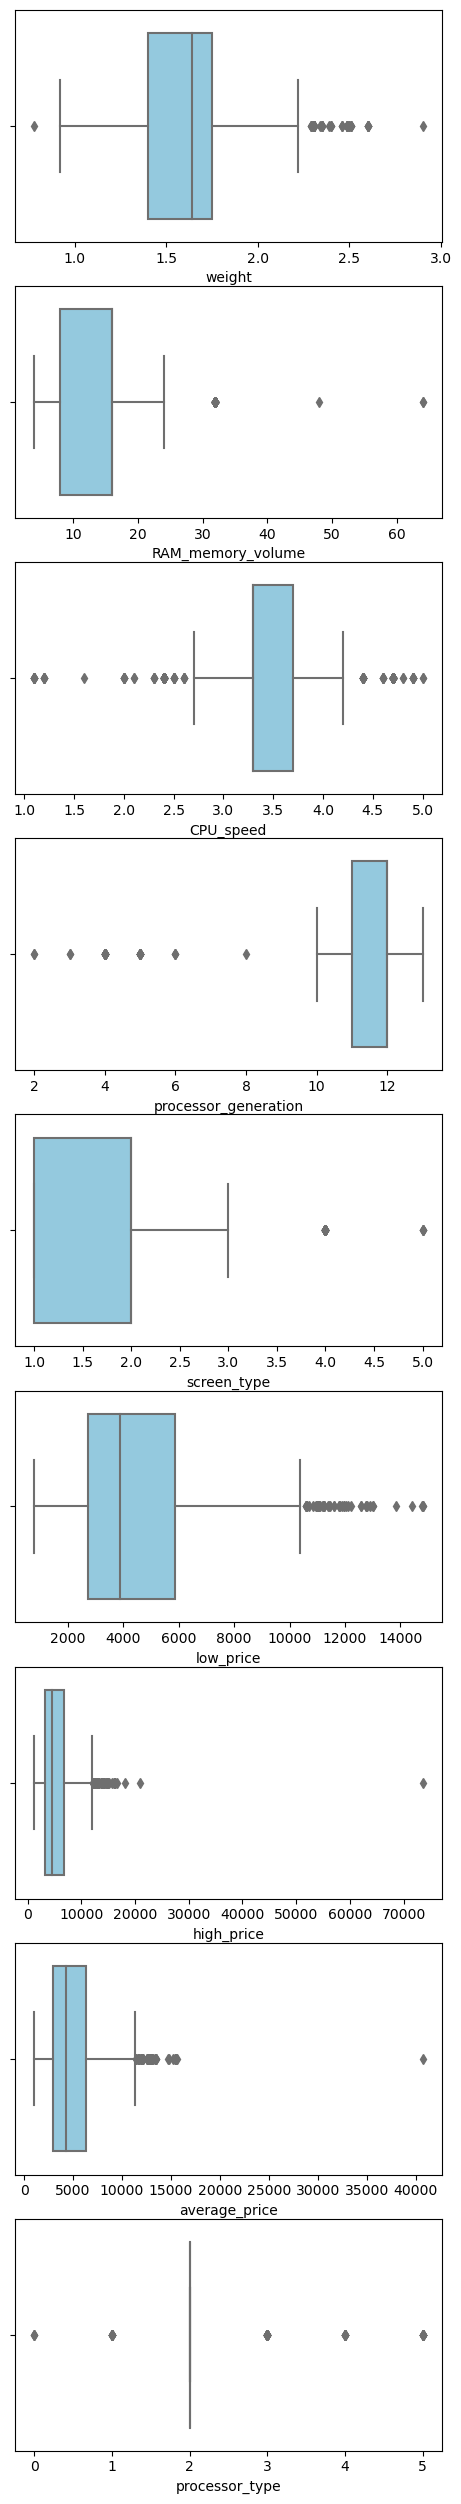

In [41]:
#looking for outlayers

numeric_cols_to_check = nueric_data_dis.columns
figure_, ax_arr = plt.subplots(len(numeric_cols_to_check), 1, figsize=(5, 25))
plt.tight_layout()
for j, col in enumerate(numeric_cols_to_check):
    sns.boxplot(data=nueric_data_dis, x=col, ax=ax_arr[j], color='skyblue')


In [43]:
#lets delete the high_price outlayers that seems to be too much high 
df=df[(df['high_price'] < 25000)]
df.describe()

,operating_system,weight,RAM_memory_volume,CPU_speed,processor_generation,touch_screen,webcam,security_measures,low_price,high_price,average_price
count,893.000000,879.000000,889.000000,779.000000,774.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,0.661814,1.667531,14.807649,3.443517,11.356589,0.162374,0.985442,0.516237,4615.942889,5469.307951,5042.625420
std,0.473357,0.314660,7.302976,0.737531,2.053483,0.369000,0.119841,0.500016,2677.535588,3137.072548,2890.373102
min,0.000000,0.780000,4.000000,1.100000,2.000000,0.000000,0.000000,0.000000,785.000000,1250.000000,1029.500000
25%,0.000000,1.400000,8.000000,3.300000,11.000000,0.000000,1.000000,0.000000,2698.000000,3240.000000,2959.500000
50%,1.000000,1.650000,16.000000,3.400000,12.000000,0.000000,1.000000,1.000000,3832.000000,4598.000000,4217.000000
75%,1.000000,1.760000,16.000000,3.700000,12.000000,0.000000,1.000000,1.000000,5783.000000,6816.000000,6309.000000
max,1.000000,2.900000,64.000000,5.000000,13.000000,1.000000,1.000000,1.000000,14799.000000,20998.000000,15591.500000


Text(0.5, 1.0, 'Number of cumputers for each manufacturer')

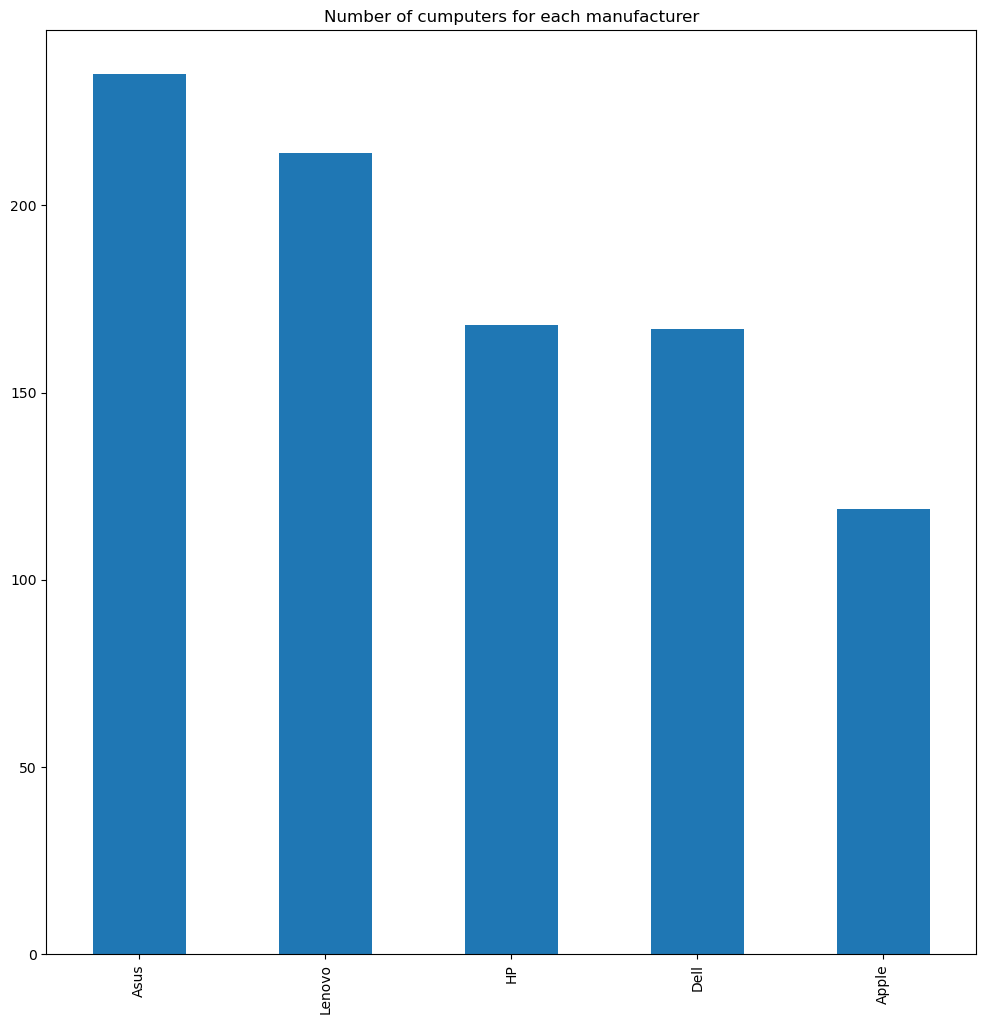

In [15]:
#visualize number of cumputers for each manufacturer in my df
df = df[df['manufacturer'] != 'manufacturer']
df['manufacturer'].value_counts().plot(kind='bar', figsize=(12, 12)) 
text = 'Number of cumputers for each manufacturer'
plt.title(text)

Text(0.5, 1.0, 'Division by percentages')

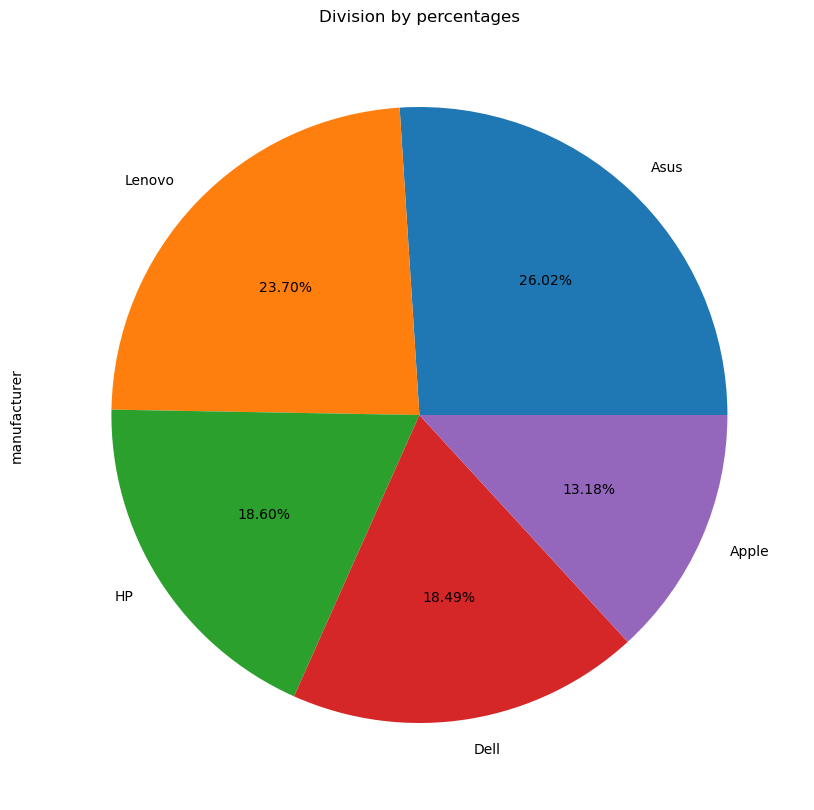

In [16]:
df['manufacturer'].value_counts().plot(kind='pie',autopct="%.2f%%", figsize= (18,10))
text ='Division by percentages'
plt.title(text)

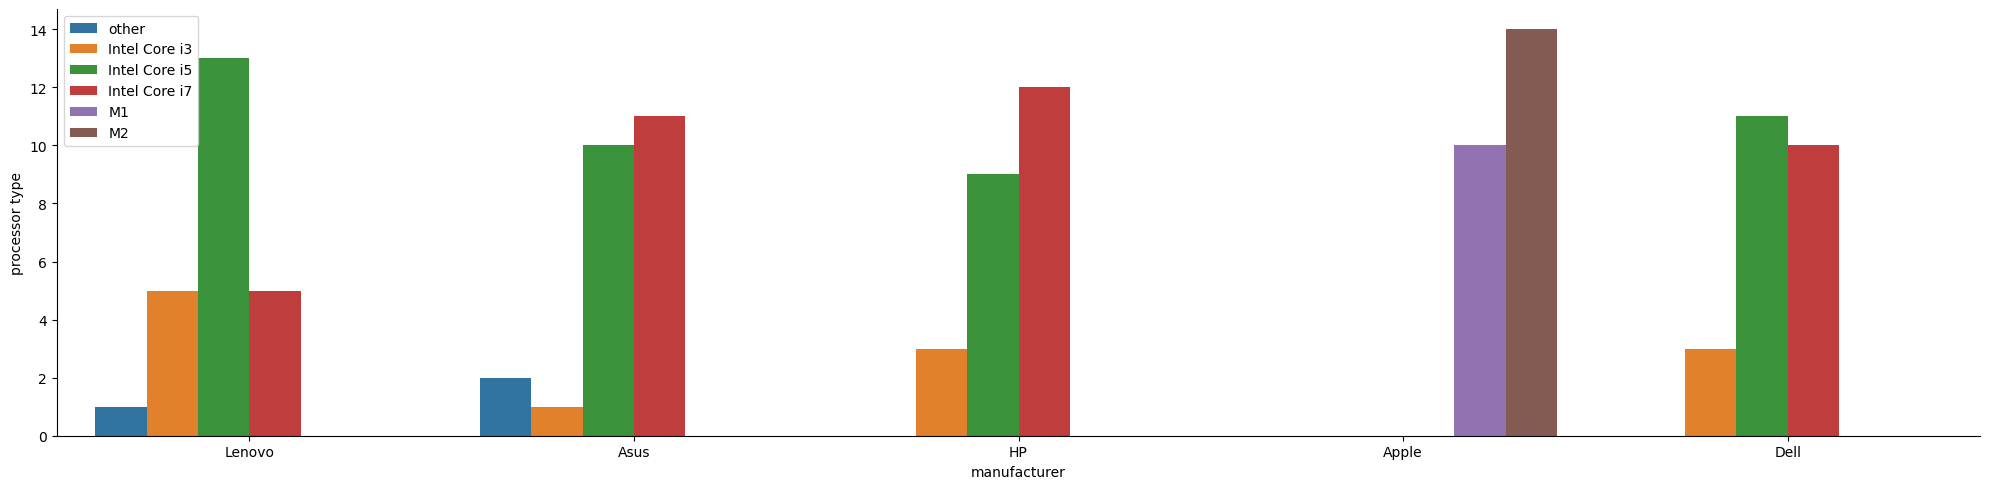

In [36]:
#looking into processor type distribution for each manufacturer
T = sns.catplot(
    x='manufacturer', 
    data = df,
    kind='count',
    hue='processor_type',
    height=5, 
    aspect=4,
    legend=False,
    ).set_axis_labels('manufacturer', 'processor type')
T.ax.legend(labels=['other','Intel Core i3','Intel Core i5','Intel Core i7','M1', 'M2'])

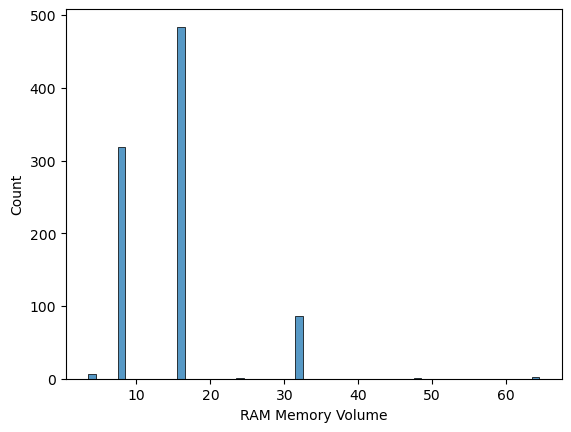

In [20]:
#number of computer with ram memory value 4/8/16/32

sns.histplot(df['RAM_memory_volume'], bins=[4, 8, 16, 32], discrete=True, kde=False)

# Set labels and title
plt.xlabel('RAM Memory Volume')
plt.ylabel('Count')

# Display the plot
plt.show()

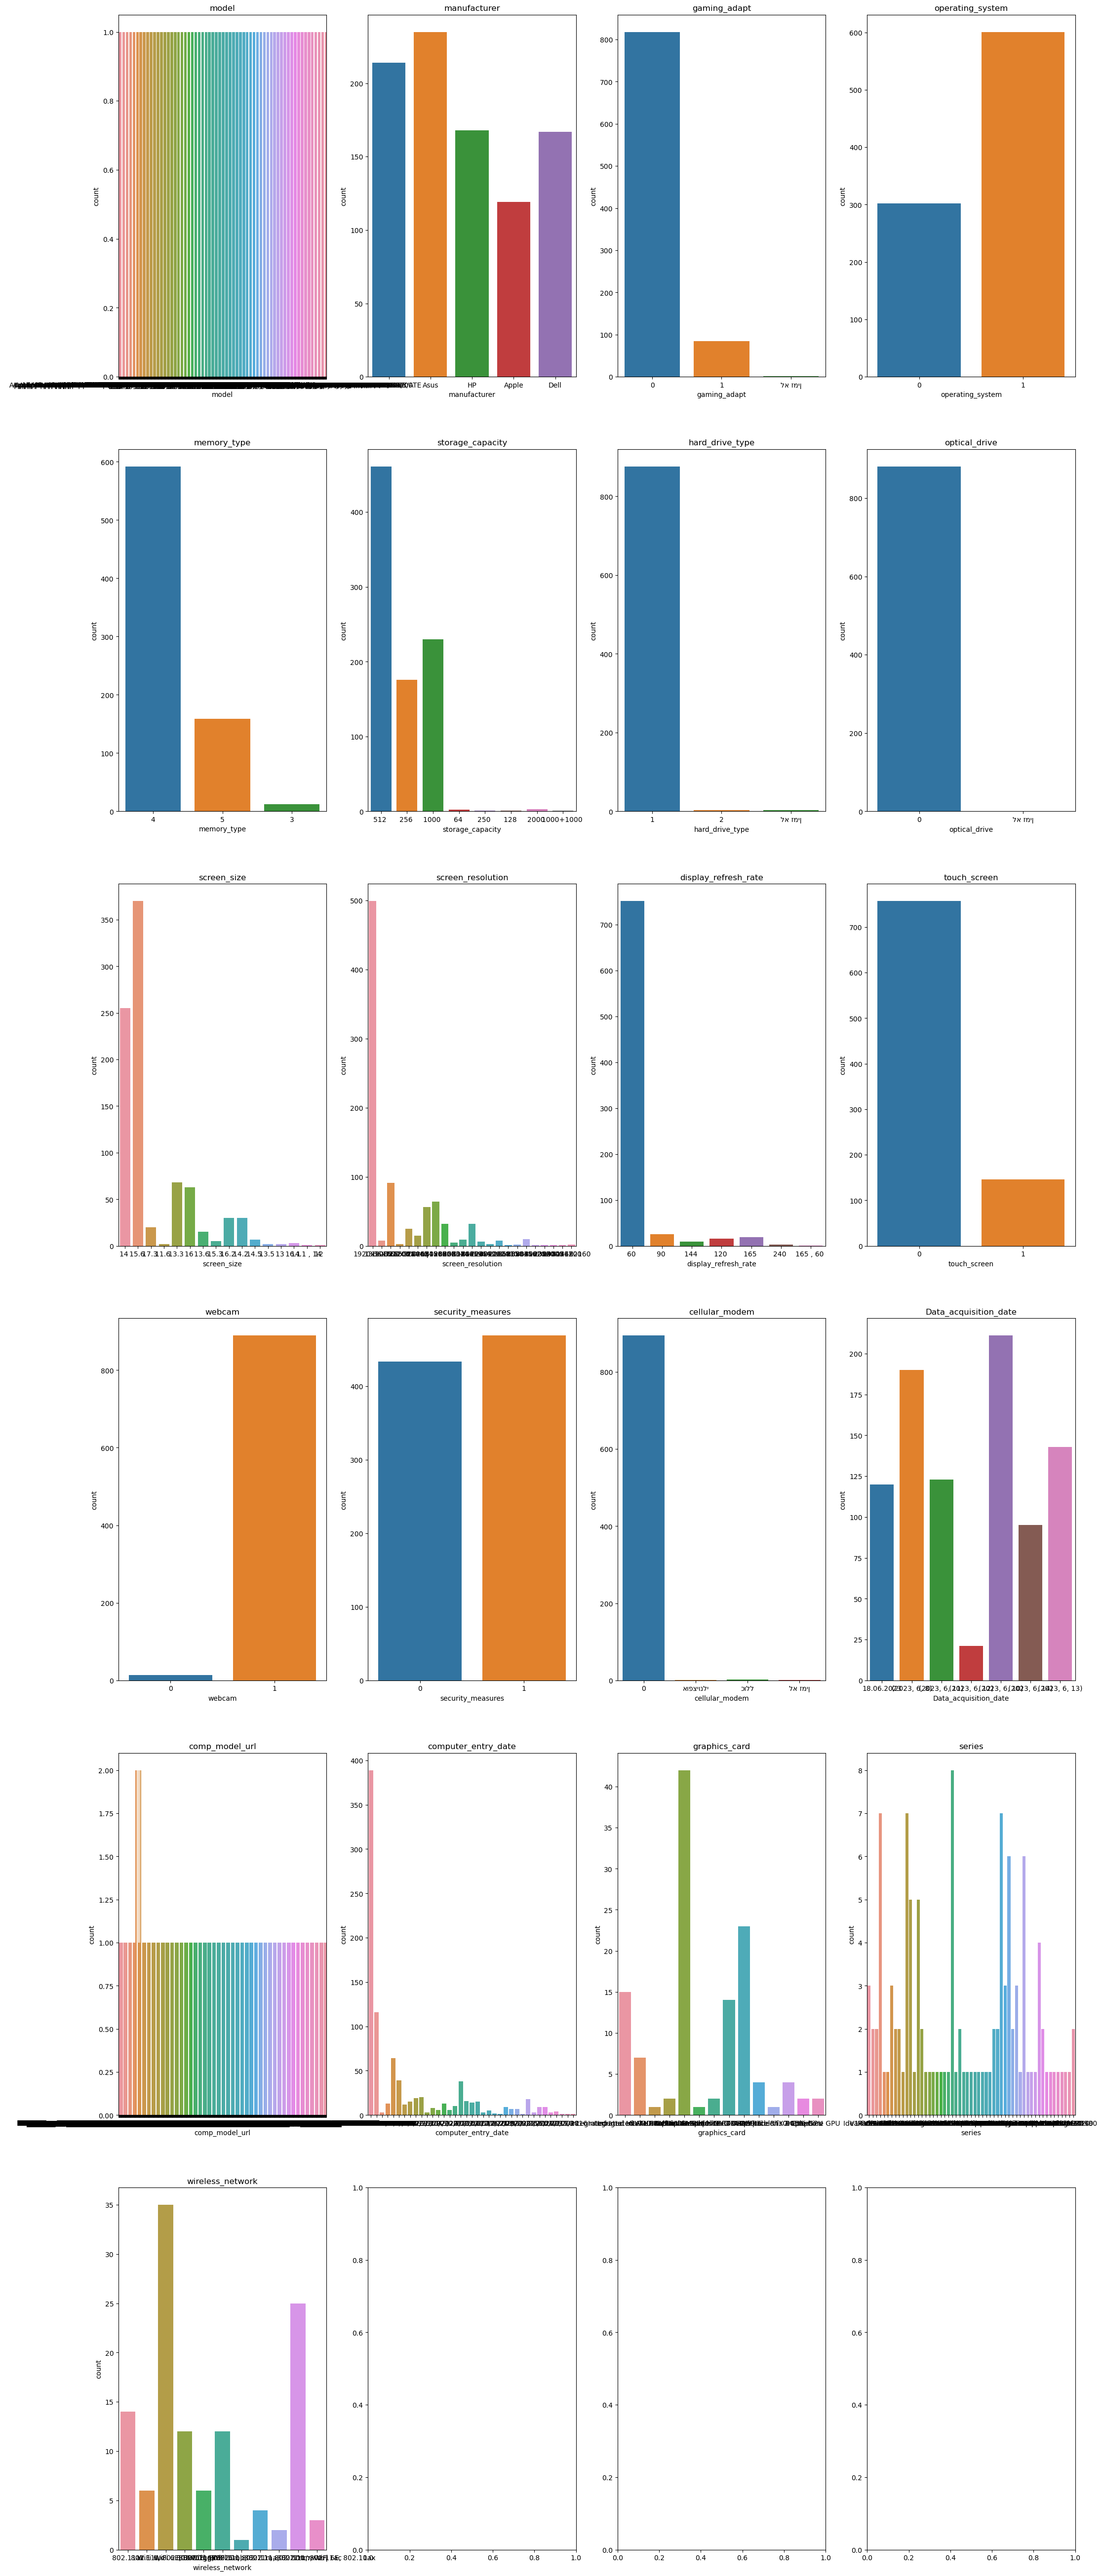

In [21]:
#dispalying some more plots that can help us  
num_of_plots = 22
num_of_cols = 4
num_of_rows = (num_of_plots // num_of_cols) + (num_of_plots % num_of_cols > 0)
figure, arr = plt.subplots(num_of_rows, num_of_cols, figsize=(25, 65))
arr = arr.flatten()
for i, col in enumerate(categor_cols):
    sns.countplot(x=df[col], ax=arr[i])
    arr[i].set_title(col)
plt.subplots_adjust(top=0.90)
plt.show()

In [23]:
#let's remove optical_drive and cellular_modem since the data is the same for all computer, we can see it as one color in out plot
df=df.drop(['optical_drive','cellular_modem'],axis=1)
categor_cols.remove('optical_drive')
categor_cols.remove('cellular_modem')

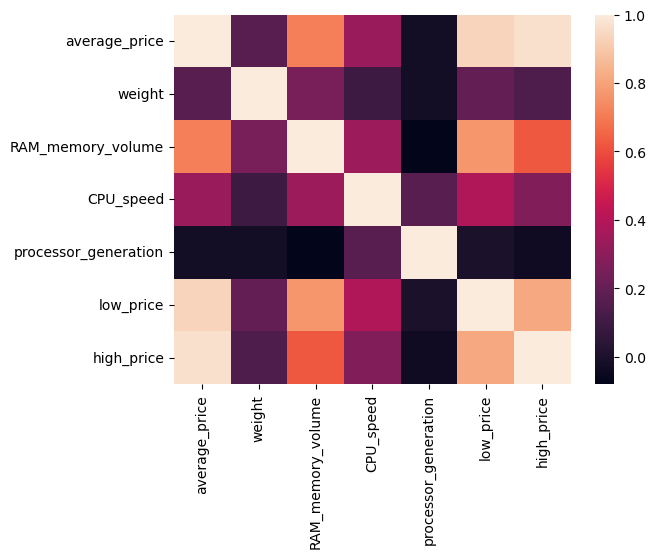

In [22]:
def heatmap_func(numeric_dataframe):
    first_col = numeric_dataframe.pop('average_price')
    numeric_dataframe.insert(0, 'average_price', first_col)
    sns.heatmap(numeric_dataframe.corr())

    
numerical_data=df[numeric_cols]
computersHeatmap = numerical_data.select_dtypes(include='number')
heatmap_func(computersHeatmap)

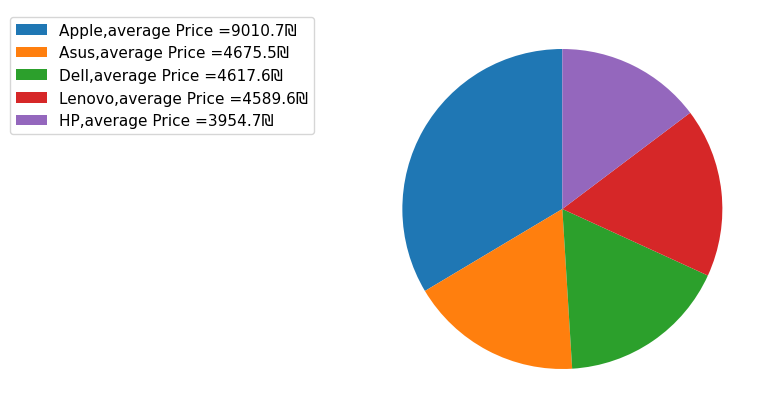

In [26]:
#display avrage price sorting by manufacturer

display_by_manufacturer = df['manufacturer'].value_counts()

comp_price= df.groupby('manufacturer', as_index=False)['average_price'].mean()
comp_price.sort_values(by="average_price", inplace=True, ascending=False)

labels = ['Apple', 'Asus', 'Dell', 'Lenovo', 'HP']

figure1, arr1 = plt.subplots(figsize=(8, 4))
figure1.subplots_adjust(0.4,0,1,1)


p, t = arr1.pie(comp_price['average_price'].tolist(), startangle=90)

plt.legend(
    loc='upper left',
    labels=['%s,average Price =%1.1f₪' % (
        l, (v)) for l, s, v in zip(labels, comp_price.index, comp_price['average_price'].tolist())],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=figure1.transFigure
)

plt.show()

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR


In [31]:
# Read the CSV file
computers = pd.read_csv('ml_df.csv')

# Label encode categorical columns
le = LabelEncoder()
computers['manufacturer'] = le.fit_transform(computers['manufacturer'])
computers['wireless_network'] = le.fit_transform(computers['wireless_network'])
computers['graphics_card'] = le.fit_transform(computers['graphics_card'])

# Drop irrelevant columns
df_model = computers.drop(['model', 'series', 'comp_model_url'], axis=1)

# Check for missing values
print(df_model.isna().sum())

# Fill missing values with mode
df_model_filled = df_model.fillna(df_model.mode().iloc[0])

# Print the updated DataFrame information
print(df_model_filled.info())

# Define the features and target variable
features = df_model_filled[['manufacturer', 'operating_system', 'weight', 'RAM_memory_volume',
                            'CPU_speed', 'processor_generation', 'low_price', 'graphics_card',
                            'wireless_network']]

# Split the target variable into 10 bins
target_bins = pd.cut(df_model_filled['average_price'], bins=10, labels=False)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target_bins, test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
reg_model = lr.fit(x_train, y_train)
y_pred_lr = reg_model.predict(x_test)

# Train a random forest regression model
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Train a support vector regression model
svr = SVR()
reg_model_svr = svr.fit(x_train, y_train)
y_pred_svr = reg_model_svr.predict(x_test)

# Evaluate the models
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_svr = r2_score(y_test, y_pred_svr)

manufacturer               0
gaming_adapt               0
operating_system           0
weight                    15
RAM_memory_volume          5
CPU_speed                123
processor_generation     128
memory_type              140
storage_capacity          28
hard_drive_type           21
screen_size               29
screen_resolution         28
screen_type               42
display_refresh_rate      79
touch_screen               0
webcam                     0
security_measures          0
low_price                 10
high_price                10
average_price              1
Data_acquisition_date      0
computer_entry_date        0
graphics_card              0
processor_type           783
wireless_network           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer           903 non-null    int64  
 

In [32]:
print("Linear Regression R-squared:", r2_lr)
resDF1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_lr})
resDF1

Linear Regression R-squared: 0.765834742041941


,Actual,Predicted
70,0,0.174202
457,1,0.839026
218,1,1.165338
250,1,1.032071
39,1,0.467960
...,...,...
863,0,-0.155522
442,0,0.003538
858,0,0.196262
25,0,-0.133358


In [33]:
print("Random Forest Regression R-squared:", r2_rf)
resDF2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_rf})
resDF2

Random Forest Regression R-squared: 0.9408566344923829


,Actual,Predicted
70,0,0.00
457,1,1.00
218,1,1.00
250,1,1.00
39,1,0.48
...,...,...
863,0,0.00
442,0,0.00
858,0,0.00
25,0,0.00


In [34]:
print("Support Vector Regression R-squared:", r2_svr)
resDF3 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_svr})
resDF3

Support Vector Regression R-squared: 0.8033243743525186


,Actual,Predicted
70,0,0.055733
457,1,0.778728
218,1,1.241595
250,1,1.172334
39,1,0.452063
...,...,...
863,0,-0.086567
442,0,-0.099183
858,0,0.006264
25,0,-0.079877
